<a href="https://colab.research.google.com/github/hyeje0nglee/hyeje0nglee/blob/main/%EB%87%8C%EC%A1%B8%EC%A4%91_%EC%98%88%EC%B8%A1_%EC%97%B0%EA%B5%AC__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Brain Stroke

  뇌졸중은 뇌혈관이 막히거나(blockage) 파열되면(rupture) 뇌세포에 피와 산소 공급이 안되서 발생하는 질환으로, 빠르게 처치가 되지 않으면 장기적인 뇌손상이 생기거나 사망까지 이를 수 있다.
  
  뇌졸중은 초기 단계에 발견되면 예방할 수도 있고, 여러 경고 증상을 조기에 발견하면 중증도를 낮출 수 있다.

  아직까지는 머신러닝과 딥러닝 기반의 심장병 발병 예측 방법에 대한 연구가 주로 이루어지고 있고, 뇌졸중에 대한 연구는 많지 않다.
  
  이 [연구](https://www.ejece.org/index.php/ejece/article/view/483)에서는 9가지의 머신러닝과 2가지의 딥러닝 기술 기반 분류 알고리즘을 통해 어떤 기술이 뇌졸중 발병 가능성을 가장 정확히 예측할 수 있는지 평가한다.


In [121]:
import numpy as np # linear algebra!!!!!!!!!!!!!!!!!!!!!!!!!
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #install scikit-learn
from imblearn.over_sampling import SMOTE #pip install imbalanced-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_curve,recall_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier #pip install xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [123]:
#Reading the dataset
dataset = pd.read_csv("/content/healthcare-dataset-stroke-data - 복사본.csv")
print(dataset)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [124]:
data = dataset.copy() #원본데이터 유지하고 수정및 분석용으로 카피 만들기

**Data Preprocessing**

---


In [152]:
#Data Description
print(data.shape) #데이터의 행과 열의 개수를 튜플로 반환 (5110,12)

(5110, 11)


In [153]:
print(data.info()) #데이터프레임 요약 정보 (데이터 타입 (int, float, object), 개수, 결측값 수 등)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   float64
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 439.3 KB
None


In [156]:
dataset = pd.read_csv("/content/healthcare-dataset-stroke-data - 복사본.csv")
print(data.isnull().sum()) #결측값이 몇개 있는지 계산하고 더함
print(data.describe())
print (data)

gender                 1
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
            gender          age  hypertension  heart_disease  ever_married  \
count  5109.000000  5110.000000   5110.000000    5110.000000   5110.000000   
mean      0.586025    43.226614      0.097456       0.054012      0.656164   
std       0.492592    22.612647      0.296607       0.226063      0.475034   
min       0.000000     0.080000      0.000000       0.000000      0.000000   
25%       0.000000    25.000000      0.000000       0.000000      0.000000   
50%       1.000000    45.000000      0.000000       0.000000      1.000000   
75%       1.000000    61.000000      0.000000       0.000000      1.000000   
max       1.000000    82.000000      1.000000       1.000000      1.000000   

         

**Missing Data Analysis: 결측치 처리**
- BMI 열의 데이터 중 201개의 값이 누락됨 (null).
- 연구에서는 데이터 공백을 없애기 위해 최빈값(mode, 28.7)를 사용함.
- 그러나 최빈값은 주로 범주형 데이터나 특정 범주에 값이 집중된 경우에 적합하여,BMI와 같은 연속형 데이터에서는 중심 경향성을 유지하기 위해 평균값(mean, 28.89)을 사용하는 것이 데이터 왜곡을 줄이는 데 더 적합하다고 판단함.
- 따라서 결측치를 평균값으로 대체하여 처리함.

In [126]:
#Missing Data Analysis: 결측치 처리
data['bmi'].fillna(data['bmi'].mode(),inplace=True) # 결측값을 평균으로 채우기
print(data.isnull().sum()) #결측값이 잘 채워졌는지 확인

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


**Categorization of Data: 데이터 분류**
- 범주형 데이터와 숫자형 데이터를 분류하고 LabelEncoder() 함수를 이용하여 각 범주형 값에 정수 라벨 할당함.
- 정수 라벨을 할당하는 과정에서 연구에서 정의한 라벨과 다르게 할당됨. (이유: LabelEncoder() 함수가 자동적으로 알파벳 사전 순서대로 (대문자 -> 소문자) 기준으로 정수를 라벨링함.)
- 연구 재현성을 위해 연구에서 정의한 기준에 따라 직접 매핑함.

In [127]:
#Categorization of Data: 데이터 분류 (Label Encoding: 범주형 데이터를 숫자형 데이터로 변환)
categorical = ['gender' ,'ever_married','work_type','Residence_type','smoking_status']
numerical = ['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi']

In [128]:
#1. 고유값 확인 (데이터의 분포를 파악하기 위해 출력)
print('work_type : ', data['work_type'].unique())
print('gender : ', data['gender'].unique())
print('Residence_type : ', data['Residence_type'].unique())
print('ever_married : ', data['ever_married'].unique())
print('smoking_status : ', data['smoking_status'].unique())

# 2. 수동 매핑 정의 (연구 기준에 맞게 설정)
gender_mapping = {'Male': 0, 'Female': 1}
work_type_mapping = {
    'children': 0,
    'Govt_job': 1,
    'Never_worked': 2,
    'Private': 3,
    'Self-employed': 4
}
smoking_status_mapping = {
    'formerly smoked': 0,
    'never smoked': 1,
    'smokes': 2,
    'Unknown': 3
}
residence_type_mapping = {'Rural': 0, 'Urban': 1}

ever_married_mapping ={'No': 0, 'Yes': 1}

# 3. 수동 매핑 적용
data['gender'] = data['gender'].map(gender_mapping)
data['work_type'] = data['work_type'].map(work_type_mapping)
data['smoking_status'] = data['smoking_status'].map(smoking_status_mapping)
data['Residence_type'] = data['Residence_type'].map(residence_type_mapping)
data['ever_married'] = data['ever_married'].map(ever_married_mapping)

encoder = LabelEncoder() #각 범주형 값에 고유한 정수(label) 할당
gender = encoder.fit_transform(data['gender']) #fit_transform = 고유한 범주를 학습시켜 숫자로 변환
ever_married = encoder.fit_transform(data['ever_married'])
work_type = encoder.fit_transform(data['work_type'])
Residence_type = encoder.fit_transform(data['Residence_type'])
smoking_status = encoder.fit_transform(data['smoking_status'])



work_type :  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
gender :  ['Male' 'Female' 'Other']
Residence_type :  ['Urban' 'Rural']
ever_married :  ['Yes' 'No']
smoking_status :  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [129]:
# 매핑 결과 출력 (변환 확인)
print("Unique values after encoding:")
print("gender:", data['gender'].unique())
print("work_type:", data['work_type'].unique())
print("smoking_status:", data['smoking_status'].unique())
print("ever_married:", data['ever_married'].unique())
print("Residence_type:", data['Residence_type'].unique())


Unique values after encoding:
gender: [ 0.  1. nan]
work_type: [3 4 1 0 2]
smoking_status: [0 1 2 3]
ever_married: [1 0]
Residence_type: [1 0]


**Standard scaling: 표준화**
- KNN, SVM과 같이 거리 기반 알고리즘은 특징들의 단위나 스케일에 민감하기 때문에 데이터를 0과 1 사이의 범위로 선형적으로 변환해주는 단계가 필요함.

**Principal Component Analysis (95% PCA): 주성분 분석**
- 데이터 특성이 너무 많아 모델이 과적합될 가능성이 있기 때문에 고차원의 데이터에서 노이즈를 제거하고 95%의 주된 특징만을 살려  차원을 축소하는 기법임.


Data after dropping rows with missing values: (4908, 10)
선택된 주성분 개수: 9
누적 설명 분산 비율: [0.28436153 0.40435178 0.50438542 0.59832109 0.68876376 0.77094801
 0.84607372 0.91618403 0.97296041]
PCA 변환된 데이터:
[[ 3.10598776 -3.53417374  1.12416257 -1.11080475  1.6320339  -1.99957998
  -0.86488899  1.42370256 -0.32403675]
 [ 2.31624811 -2.53391249 -0.76236879 -2.42839857  2.29479088 -0.13658465
   0.46557416  1.2716956  -0.4668659 ]
 [ 0.974877    0.21017454  0.921299    1.00085941 -0.00380227 -1.47607392
   0.41789762 -0.3955947   0.06509326]
 [ 2.64418325 -0.84451719 -1.02798759  2.19866337  0.31020201  1.47768308
  -0.55668364 -1.46429647  0.93796445]
 [ 2.09926424 -0.79856855  0.9699843  -0.53536862 -0.92869659 -1.06138539
  -1.36622483 -0.96613851 -0.1103266 ]]


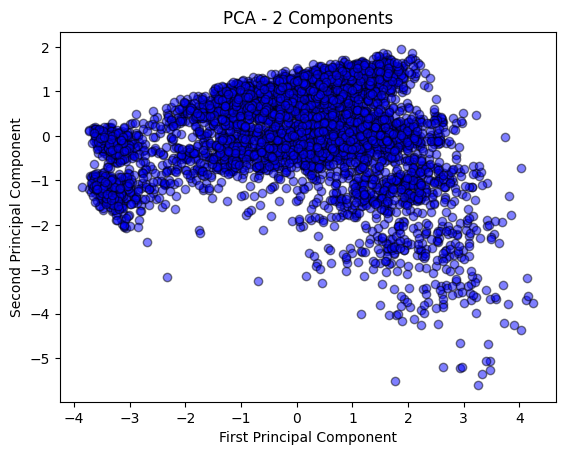

In [130]:
# 결측값이 포함된 행 삭제 후 데이터 크기 확인
data_dropped = data[['gender' ,'ever_married','work_type','Residence_type','smoking_status', 'age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi']].dropna()
print(f"Data after dropping rows with missing values: {data_dropped.shape}")

# 데이터가 남아있으면 표준화 및 PCA 진행
if data_dropped.shape[0] > 0:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data_dropped)

    pca = PCA(n_components=0.95)  # 95%를 설명할 수 있도록 필요한 주성분 개수 자동 선택
    X_pca = pca.fit_transform(X_scaled)

    # 주성분 비율 출력
    print(f"선택된 주성분 개수: {pca.n_components_}")
    print(f"누적 설명 분산 비율: {np.cumsum(pca.explained_variance_ratio_)}")

    # PCA 변환된 데이터 출력
    print(f"PCA 변환된 데이터:\n{X_pca[:5]}")

    # 시각화
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', alpha=0.5)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA - 2 Components')
    plt.show()
else:
    print("No data left after dropping rows with missing values.")

**Handling Imbalanced Data: 불균형 데이터 처리**
- 연구의 데이터셋은 굉장히 불균형함. (뇌졸중이 있다: 249개 (4.87%), 뇌졸중이 없다: 4861개 (95.13%))
- 편향될 위험이 있고, 재현율 (recall)과 정밀도 (precision) 성능 평가를 하기에는 충분하지 않음.
Ros Approach(Random Oversampling) 기법 중 SMOTE(Synthetic Minority Over-sampling)을 이용하여 뇌졸중이 있다는 데이터 샘플을 랜덤으로 반복하여 4861개로 복제시켜 균형을 맞춤.

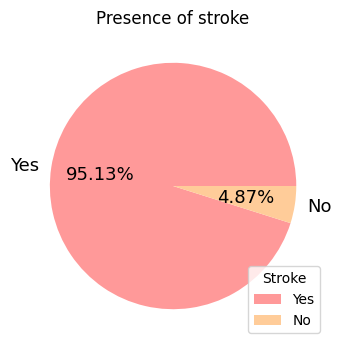

In [131]:
stroke = pd.read_csv("/content/healthcare-dataset-stroke-data - 복사본.csv")  # 파일 경로에 따라 변경

plt.figure(figsize = (4, 4))
temp = [4861,249]
labels = ['Yes','No']
colors = ['#ff9999','#ffcc99']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%', colors = colors,textprops = textprops )
plt.title('Presence of stroke')
plt.legend(title = "Stroke")
plt.show()

In [132]:
# stroke 데이터의 값 개수 계산
stroke_counts = data['stroke'].value_counts()

no_stroke_count = stroke_counts.get(0, 0)  # 뇌졸중이 없는 사람
positive_stroke_count = stroke_counts.get(1, 0)  # 뇌졸중이 있는 사람

print(f"The number of positive cases is: {positive_stroke_count}")
print(f"The number of negative cases is: {no_stroke_count}")

print("The percentage of positive cases is :", 249/5110*100)

The number of positive cases is: 249
The number of negative cases is: 4861
The percentage of positive cases is : 4.87279843444227


In [133]:
data1 = data.copy()
X = data.drop('stroke', axis = 1)
Y = data['stroke']
Y = pd.DataFrame(Y)


In [134]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# LabelEncoder로 문자열 데이터를 수치형으로 변환
encoder = LabelEncoder()

# 만약 X에 문자열이 있다면 X의 각 열에 대해 변환
X_encoded = X.apply(encoder.fit_transform)

# Y가 문자열인 경우도 변환
Y_encoded = encoder.fit_transform(Y)

# SMOTE로 오버샘플링 수행
smote = SMOTE(random_state=10)
X1, Y1 = smote.fit_resample(X_encoded, Y_encoded)

# 결과 확인
print("Original dataset shape:", dict(Y.value_counts()))
print("Resampled dataset shape:", dict(pd.Series(Y_resampled).value_counts()))

Original dataset shape: {(0,): 4861, (1,): 249}
Resampled dataset shape: {1: 4861, 0: 4861}


In [135]:
#SMOTE 오버샘플링 후의 결과
Y1 = pd.DataFrame(Y1)
X1 = pd.DataFrame(X1)
Y1.value_counts()

,count
0,
0,4861
1,4861


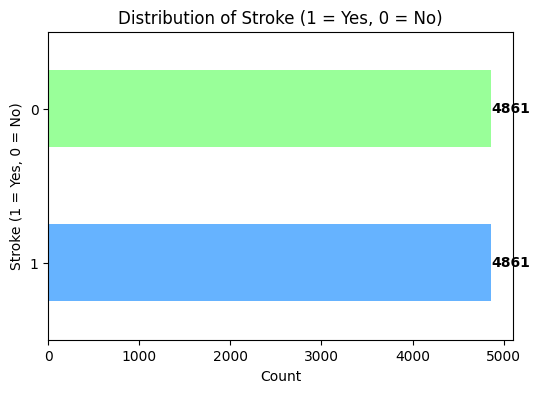

In [136]:
# Y1에서 value_counts()를 구합니다
value_counts = Y1[0].value_counts()

# 가로형 바 그래프 그리기
plt.figure(figsize=(6, 4))
value_counts.plot(kind='barh', color=['#66b3ff', '#99ff99'])

# 각 바에 숫자 추가
for index, value in enumerate(value_counts):
    plt.text(value, index, str(value), va='center', ha='left', fontweight='bold')

plt.xlabel('Count')
plt.ylabel('Stroke (1 = Yes, 0 = No)')
plt.title('Distribution of Stroke (1 = Yes, 0 = No)')
plt.show()

**Splitting the data into train and test (80/20): 학습 데이터와 평가 데이터로 나누기**
- 연구에서는 80/20 과 70/30 비율에 대한 언급이 있어서 둘 중, 어떤 비율로 나눠서 학습시키고 평가했는지 명확히 알 수 없음.
- 둘 다 실행해본 결과, 뇌졸중이 있는 사람과 없는 사람의 수의 분포가 **80/20**의 비율로 학습하고 평가했을 때 **조금 더 균등함**.

    *  **70/30** 일 때, 뇌졸중이 없는 클래스 (0)의 훈련 데이터 3407개, 뇌졸중이 있는 클래스의 훈련 데이터(1) 3398개 -> 두 클래스 간의 데이터 갯수 차이 = **9**
    *  **80/20** 일 때, 뇌졸중이 없는 클래스 (0)의 훈련 데이터 3892번, 뇌졸중이 있는 클래스의 훈련 데이터(1) 3885개 -> 두 클래스 간의 데이터 갯수 차이 = **7**


In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1,test_size=0.2,random_state = 105)

Y_train.value_counts()

#클래스 0과 클래스 1이 거의 균등하게 분포한다
#모델이 두 클래스를 균등하게 학습하고 예측할 가능성이 높음
#바람직한 결과

,count
0,
0,3892
1,3885


**Machine Learning Algorithms: 머신러닝 모델 학습**

- Decision Tree (DT): 의사결정나무
- Random Forest (RF): 랜덤포레스트
- Naive Bayes (NB): 나이브베이즈
- K Nearest Neighbors (KNN): K-최근접이웃
- Support Vectore Machine (SVM): 서포트벡터머신
- Logistic Regression (LR): 로지스틱 회귀


[0.01905089 0.43448728 0.01640847 0.01690482 0.02135831 0.05701505
 0.03169075 0.21356842 0.14008645 0.04942958]
Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')
90.64267352185091 %


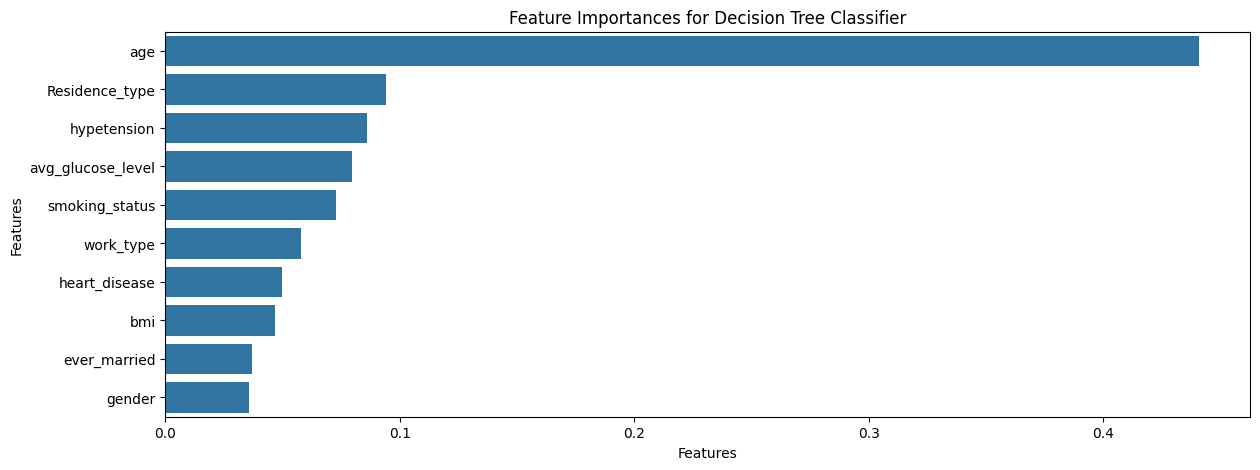

[[860 109]
 [ 73 903]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       969
           1       0.89      0.93      0.91       976

    accuracy                           0.91      1945
   macro avg       0.91      0.91      0.91      1945
weighted avg       0.91      0.91      0.91      1945

roc_auc_score for Decision Tree Classifier:  0.9063589089647939


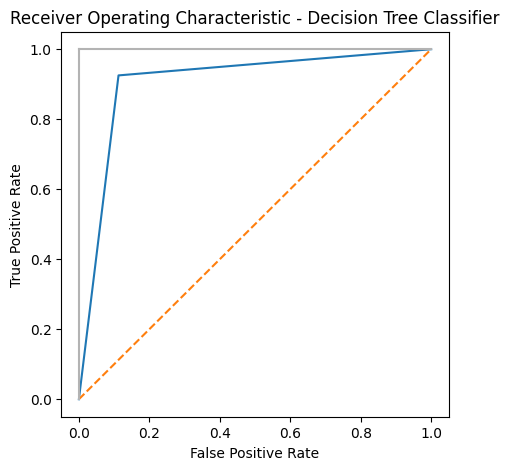

In [144]:
#의사결정나무
DTC = DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

print(DTC.feature_importances_)
print(X_train.columns)


Y_pred_DTC = DTC.predict(X_test)
DTC_Accuracy = accuracy_score(Y_test, Y_pred_DTC)
print(DTC_Accuracy*100,'%')


imp_feature = {"Features" : [ 'age','Residence_type', 'hypetension','avg_glucose_level','smoking_status','work_type','heart_disease','bmi','ever_married','gender'],
         'values' : [0.4406506, 0.0940964,0.08614509, 0.07980055, 0.07281029,0.05769702,0.04967563,0.04671055,0.03678735,0.03562653]}
imp_feature = pd.DataFrame(data=imp_feature)
imp_feature

plt.figure(figsize = (14, 5))
bargraph = sns.barplot(x=imp_feature['values'], y = imp_feature['Features'], data=imp_feature)
plt.xlabel('Features')
plt.title("Feature Importances for Decision Tree Classifier")
plt.show()

CM = confusion_matrix(Y_test, Y_pred_DTC)
print(CM)

print(classification_report(Y_test, Y_pred_DTC))

y_score_DTC = DTC.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score_DTC)
print('roc_auc_score for Decision Tree Classifier: ', roc_auc_score(Y_test, y_score_DTC))

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - Decision Tree Classifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

93.16195372750643 %
[[874  95]
 [ 38 938]]
True Positives :  938
True Negatives :  874
False Positives :  95
False Negatives :  38
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       969
           1       0.91      0.96      0.93       976

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945

specificity = 0.9019607843137255
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       969
           1       0.91      0.96      0.93       976

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945

specificity = 0.9019607843137255


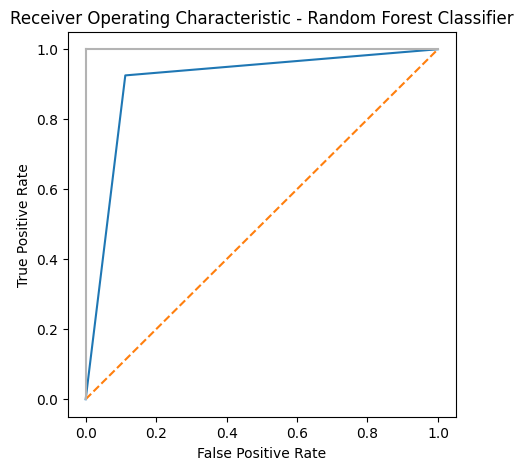

In [151]:
#랜덤포레스트

RF = RandomForestClassifier(n_estimators=1000, random_state=47 , n_jobs = 3)
RF.fit(X_train,Y_train)
Y_Res_RF=RF.predict(X_test)
RF_Accuracy = accuracy_score(Y_test, Y_Res_RF)
print(RF_Accuracy*100,'%')

CM = confusion_matrix(Y_test, Y_Res_RF)
print(CM)
print("True Positives : " , CM[1][1])
print("True Negatives : " , CM[0][0])
print("False Positives : " , CM[0][1])
print("False Negatives : " , CM[1][0])

print(classification_report(Y_test, Y_Res_RF))
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

print(classification_report(Y_test, Y_Res_RF))
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test, y_score_DTC)

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - Random Forest Classifier')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


80.41131105398458 %

Confusion Matrix: 
 [[694 275]
 [106 870]]
              precision    recall  f1-score   support

           0       0.87      0.72      0.78       969
           1       0.76      0.89      0.82       976

    accuracy                           0.80      1945
   macro avg       0.81      0.80      0.80      1945
weighted avg       0.81      0.80      0.80      1945

specificity = 0.7162022703818369
roc_auc_score for Gaussian Naive Bayes:  0.8805871356307838


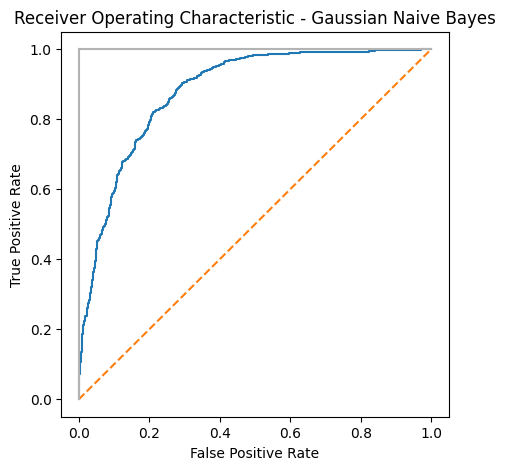

In [145]:
#나이브베이즈
NB = GaussianNB()
NB.fit(X_train, Y_train)
Y_pred_NB = NB.predict(X_test)
NB_accuracy = accuracy_score(Y_test,Y_pred_NB)
print(NB_accuracy*100,'%')

CM = confusion_matrix(Y_test, Y_pred_NB)
print("\nConfusion Matrix: \n", CM)


print(classification_report(Y_test, Y_pred_NB))

print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

y_score_NB = NB.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score_NB)
print('roc_auc_score for Gaussian Naive Bayes: ', roc_auc_score(Y_test, y_score_NB))

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - Gaussian Naive Bayes')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

85.60411311053984 %
[[726 243]
 [ 37 939]]
True Positives :  939
True Negatives :  726
False Positives :  243
False Negatives :  37
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       969
           1       0.79      0.96      0.87       976

    accuracy                           0.86      1945
   macro avg       0.87      0.86      0.85      1945
weighted avg       0.87      0.86      0.85      1945

specificity = 0.7492260061919505
roc_auc_score for K Nearest Neighbour is:  0.9272165617757026


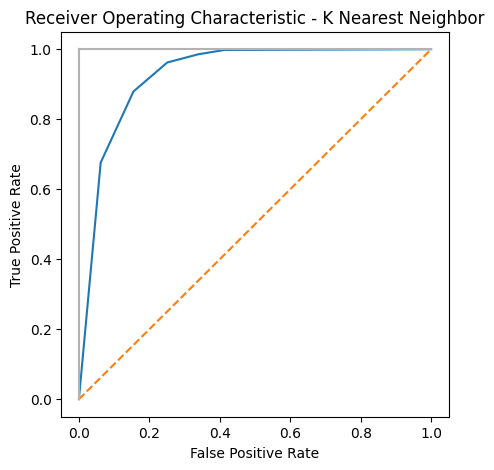

In [146]:
#k-최근접이웃

KNN_clf = KNeighborsClassifier()
KNN_clf.fit(X_train,Y_train)
Y_Res_KNN=KNN_clf.predict(X_test)
KNN_Accuracy = accuracy_score(Y_test, Y_Res_KNN)
print(KNN_Accuracy*100,'%')

CM = confusion_matrix(Y_test, Y_Res_KNN)
print(CM)

print("True Positives : " , CM[1][1])
print("True Negatives : " , CM[0][0])
print("False Positives : " , CM[0][1])
print("False Negatives : " , CM[1][0])
print(classification_report(Y_test, Y_Res_KNN))

print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

y_score_KNN = KNN_clf.predict_proba(X_test)[:,1]
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(Y_test, y_score_KNN)
print('roc_auc_score for K Nearest Neighbour is: ', roc_auc_score(Y_test, y_score_KNN))

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - K Nearest Neighbor')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [164]:
#서포트벡터머신
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model_scaled = SVC(class_weight = "balanced")
svm_model_scaled.fit(X_train_scaled, y_train)
y_pred = svm_model_scaled.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


NameError: name 'y_train' is not defined

81.79948586118252 %
[[749 220]
 [134 842]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       969
           1       0.79      0.86      0.83       976

    accuracy                           0.82      1945
   macro avg       0.82      0.82      0.82      1945
weighted avg       0.82      0.82      0.82      1945

specificity = 0.7729618163054696
roc_auc_score for Logistic Regression:  0.8892152633270738


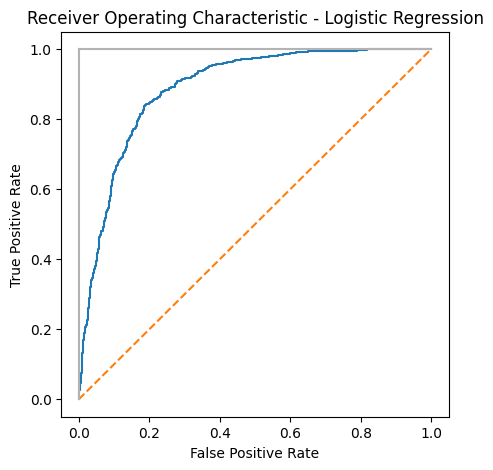

In [148]:
#로지스틱회

LR = LogisticRegression()
LR.fit(X_train,Y_train)
Y_Res_LR=LR.predict(X_test)
LR_Accuracy = accuracy_score(Y_test, Y_Res_LR)
print(LR_Accuracy*100,'%')

CM = confusion_matrix(Y_test, Y_Res_LR)
print(CM)

print(classification_report(Y_test, Y_Res_LR))
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

y_score_LR = LR.predict_proba(X_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test, y_score_LR)

print('roc_auc_score for Logistic Regression: ', roc_auc_score(Y_test, y_score_LR))


plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Boosting Techniques: 부스팅 모델 학습**

- XGBoost
- AdaBoost
- LightGBM

94.34447300771208 %
Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')
[0.0763121  0.22904646 0.0938402  0.09951673 0.10652626 0.1335285
 0.08431665 0.05165621 0.04881646 0.07644041]


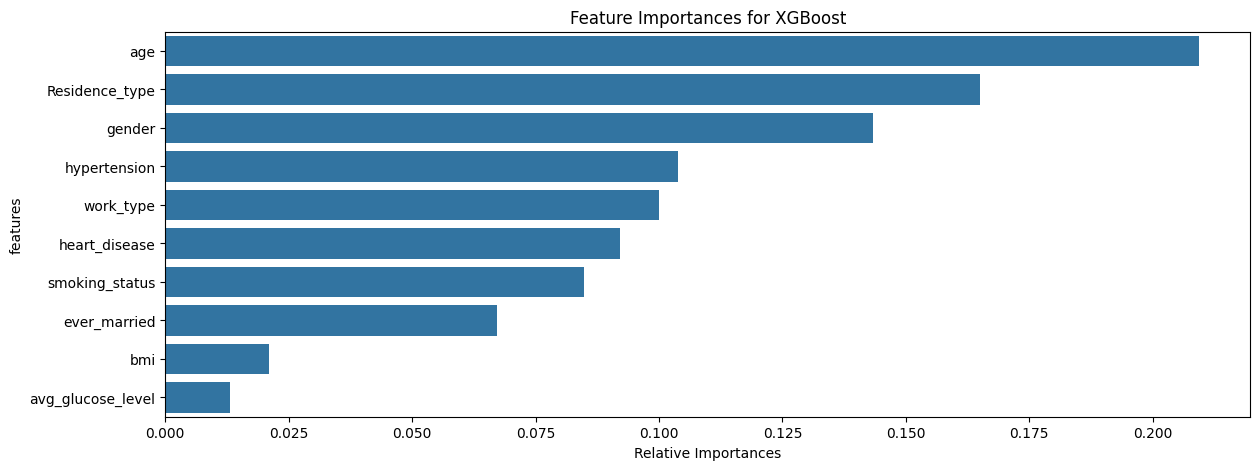

[[895  74]
 [ 36 940]]
True Positives :  940
True Negatives :  895
False Positives :  74
False Negatives :  36

               precision    recall  f1-score   support

           0       0.96      0.92      0.94       969
           1       0.93      0.96      0.94       976

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945

specificity = 0.9236326109391125
roc_auc_score for XGBoost is:  0.9841500448324283


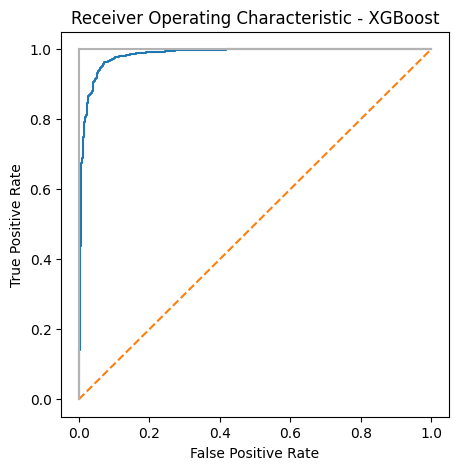

In [150]:
#XGBoost
XG_classifier = XGBClassifier()
XG_classifier.fit(X_train, Y_train)
Y_pred_xg = XG_classifier.predict(X_test)
XG_Accuracy = accuracy_score(Y_test,Y_pred_xg)
print(XG_Accuracy*100,"%")

features = X_train.columns
importances = XG_classifier.feature_importances_
print(features)
print(importances)

imp_feature_xg = {'features' : ['age','Residence_type', 'gender','hypertension','work_type','heart_disease','smoking_status','ever_married','bmi', 'avg_glucose_level'] , 'values' : [ 0.20928001,0.16508496,0.1434009,0.10393379,0.10006149,0.09203752,0.08475993,0.06718082,0.02110756,0.01315293]}
imp_feature_xg = pd.DataFrame(imp_feature_xg)

plt.figure(figsize = (14, 5))
bargraph = sns.barplot(x=imp_feature_xg['values'], y = imp_feature_xg['features'], data=imp_feature_xg)
plt.xlabel('Relative Importances')
plt.title("Feature Importances for XGBoost")
plt.show()

CM = confusion_matrix(Y_test, Y_pred_xg)
print(CM)
print("True Positives : " , CM[1][1])
print("True Negatives : " , CM[0][0])
print("False Positives : " , CM[0][1])
print("False Negatives : " , CM[1][0])

print("\n", classification_report(Y_test, Y_pred_xg))
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

y_score_xg = XG_classifier.predict_proba(X_test)[:,1]
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(Y_test, y_score_xg)
print('roc_auc_score for XGBoost is: ', roc_auc_score(Y_test, y_score_xg))

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - XGBoost')
plt.plot(false_positive_rate6, true_positive_rate6)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


86.426735218509 %
[[808 161]
 [103 873]]
True Positives :  873
True Negatives :  808
False Positives :  161
False Negatives :  103
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       969
           1       0.84      0.89      0.87       976

    accuracy                           0.86      1945
   macro avg       0.87      0.86      0.86      1945
weighted avg       0.87      0.86      0.86      1945

specificity = 0.8338493292053664
roc_auc_score for AdaBoost is:  0.9358584352636654


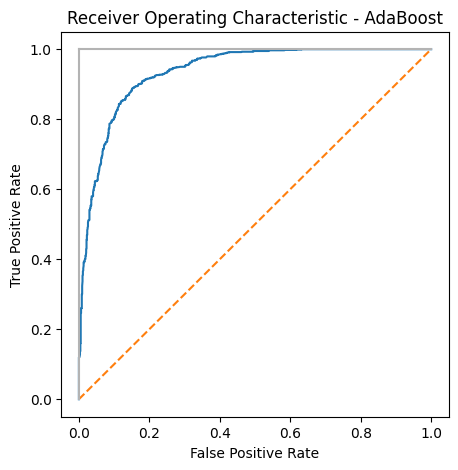

In [149]:
#AdaBoost
ADC = AdaBoostClassifier()
ADC.fit(X_train,Y_train)
Y_pred_ADC = ADC.predict(X_test)
ADC_Accuracy = accuracy_score(Y_test,Y_pred_ADC)
print(ADC_Accuracy*100,"%")

CM = confusion_matrix(Y_test, Y_pred_ADC)
print(CM)
print("True Positives : " , CM[1][1])
print("True Negatives : " , CM[0][0])
print("False Positives : " , CM[0][1])
print("False Negatives : " , CM[1][0])

print(classification_report(Y_test, Y_pred_ADC))

print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

y_score_ADC = ADC.predict_proba(X_test)[:,1]
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(Y_test, y_score_ADC)

print('roc_auc_score for AdaBoost is: ', roc_auc_score(Y_test, y_score_ADC))

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - AdaBoost')
plt.plot(false_positive_rate5, true_positive_rate5)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#LightGBM

**Deep Learning Algorithms: 딥러닝 모델 학습**

- 3-layer ANN
- 4-layer ANN